# Import library

In [220]:
from mpl_toolkits import mplot3d
import matplotlib.ticker as ticker
import pdb
import pixiedust
from tqdm import tqdm_notebook as tqdm
import numpy as np
import pandas as pd
import os
import glob
import csv
import os.path
import time
import sys
import datetime
import string
import matplotlib.pyplot as plt
import random
import warnings
%matplotlib inline
pd.set_option('display.max_rows', 500)
warnings.filterwarnings("ignore")
#from pandarallel import pandarallel

In [2]:
Acc_max_dict = {'100': 8.5, 
         '101': [3.0, 3.2, 3.4, 3.6, 3.8], 
         '102': [1.5, 1.6, 1.7, 1.8, 1.9]}  
print(Acc_max_dict)

{'100': 8.5, '101': [3.0, 3.2, 3.4, 3.6, 3.8], '102': [1.5, 1.6, 1.7, 1.8, 1.9]}


In [59]:
Veh_type_dict = {100: 'Dry', 101: 'Snow', 102: 'Ice'}
Veh_type_dict

{100: 'Dry', 101: 'Snow', 102: 'Ice'}

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'ArcGIS',
 'best.hdf5',
 'Center ID.csv',
 'cm.png',
 'create_weather_data.ipynb',
 'Curve_fig',
 'Data_cleaning.ipynb',
 'Data_vissim.ipynb',
 'Draw_figure.ipynb',
 'DriveAlong.mpg',
 'dry.csv',
 'grey_best.hdf5',
 'HV_primary_columns.ods',
 'ice.csv',
 'Literature review.docx',
 'load_Wyoming _data.ipynb',
 'models',
 'ODE_Output_Schema_Reference.docx',
 'Parameter_tuning.csv',
 'Parameter_tuning_1.csv',
 'ParseVissimOutput_Fzp_Rsr.py',
 'Precipitation.csv',
 'preciptation data',
 'Recurrence_fig',
 'S1_data_analysis.ipynb',
 'Safety_Pilot_Model_Deployment_Sample_Data_Handbook.docx',
 'sample_data_curve_cnn.ipynb',
 'sample_data_img_cnn.ipynb',
 'sample_data_lstm.ipynb',
 'sample_data_parameter_Opt_1.ipynb',
 'sample_data_recurrence_plot_grey.ipynb',
 'sample_data_recurrence_plot_rgb.ipynb',
 'sample_data_regression.ipynb',
 'slippery_detection.ipynb',
 'snow.csv',
 'vissim',
 'weather_dict.pkl',
 '__pycache__']

In [3]:
os.listdir('vissim')

['.ipynb_checkpoints',
 'AA.inp0',
 'AA.inpx',
 'AA.ipynb',
 'AA.layx',
 'AA.py',
 'AA.results',
 'AA1.sig',
 'AA2.sig',
 'AA_S1.inp0',
 'AA_S1.inpx',
 'AA_S1.layx',
 'AA_S1.results',
 'AA_S1_091.err',
 'Car2X Script.py',
 'Car2X.inpx',
 'Car2X.results',
 'Car2X_0.inpx',
 'Car2X_0.results',
 'Car2X_1.err',
 'Car2X_1.inp0',
 'Car2X_1.inpx',
 'Car2X_1.layx',
 'Car2X_1.results',
 'Car2X_1_001.fzp',
 'COM Basic Commands.py',
 'command.py',
 'dry.fzp',
 'ice.fzp',
 'S1',
 'Slip_Det.py',
 'snow.fzp']

In [4]:
os.listdir('vissim/S1')

['AA_S1.fzp']

# Tranform fzp to csv

In [24]:
def parseFzp(fileNames, outputName):
    """
    This function parse the input fzp files, remove redundant header lines
    save the data into a .csv file
    """
    headerWritten = False
    dest = open(outputName, 'w')
    myWriter = csv.writer(dest)
    for f in fileNames:
        targetLine = False
        coorLoc = -1
        with open(f, 'r') as myFile:
            for line in myFile:
                if line.startswith("$VEHICLE"):
                    line = line.replace("$VEHICLE:", "").replace("\r", "").replace("\n", "")
                    header = line.split(";")
                    headerC = [elem.replace("\\", "-") for elem in header]
                    headerC.append('X')
                    headerC.append('Y')
                    headerC.append('Z')
                    coorLoc = headerC.index("COORDFRONT")
                    if not headerWritten:
                        myWriter.writerow(headerC)
                        headerWritten = True
                    targetLine = True
                    continue
                if targetLine:
                    line = line.replace("\r", "").replace("\n", "")
                    row = line.split(";")
                    rowC = [elem.strip(' ') for elem in row]
                    coor = rowC[coorLoc].split(" ")
                    rowC.append(coor[0])
                    rowC.append(coor[1])
                    rowC.append(coor[2])
                    myWriter.writerow(rowC)
    dest.close()

In [326]:
file_no = 5
path = f'vissim/S1/AA_S1_{file_no}.fzp'
fzpFileNames = glob.glob(path)
outputName = f'AA_S1_{file_no}.csv'

In [327]:
parseFzp(fzpFileNames, outputName)

In [328]:
ds = pd.read_csv(outputName)
ds.head()

,SIMSEC,NO,VEHTYPE,LANE-LINK-NO,LANE-INDEX,POS,COORDFRONT,ACCELERATION,SPEED,WHEELSPEED,DESSPEED,QTIME,X,Y,Z
0,6.1,1,100,4,1,86.834,-89.084 19.118 0.000,0.0,62.31,62.24,62.31,0.0,-89.084,19.118,0.0
1,6.2,1,100,4,1,88.565,-88.010 17.759 0.000,0.0,62.31,62.22,62.31,0.0,-88.010,17.759,0.0
2,6.3,1,100,4,1,90.296,-86.937 16.400 0.000,0.0,62.31,62.84,62.31,0.0,-86.937,16.400,0.0
3,6.4,1,100,4,1,92.026,-85.863 15.040 0.000,0.0,62.31,62.08,62.31,0.0,-85.863,15.040,0.0
4,6.5,1,100,4,1,93.757,-84.790 13.681 0.000,0.0,62.31,62.21,62.31,0.0,-84.790,13.681,0.0


In [329]:
ds.drop(columns = ['COORDFRONT', 'Z'], inplace=True)
#  pavement type change at time 1800 and 2700
ds = ds[~ds.SIMSEC.isin(range(1800, 1811))]
ds = ds[~ds.SIMSEC.isin(range(2700, 2710))]
ds.WHEELSPEED[ds.WHEELSPEED < 0]=0

In [330]:
Acc_max_dict['101'][file_no-1], Acc_max_dict['102'][file_no-1]

(3.8, 1.9)

In [331]:
ds['WACCELERATION'] = ds['ACCELERATION']

In [332]:
ds.ACCELERATION[(ds.VEHTYPE == 101) & (ds.ACCELERATION > Acc_max_dict['101'][file_no-1])] = Acc_max_dict['101'][file_no-1]
ds.ACCELERATION[(ds.VEHTYPE == 101) & (ds.ACCELERATION < -Acc_max_dict['101'][file_no-1])] = -Acc_max_dict['101'][file_no-1]
ds.ACCELERATION[(ds.VEHTYPE == 102) & (ds.ACCELERATION > Acc_max_dict['102'][file_no-1])] = Acc_max_dict['102'][file_no-1]
ds.ACCELERATION[(ds.VEHTYPE == 102) & (ds.ACCELERATION < -Acc_max_dict['102'][file_no-1])] = -Acc_max_dict['102'][file_no-1]          

In [317]:
ds.isna().sum()
#ds.dropna(inplace = True)

SIMSEC           0
NO               0
VEHTYPE          0
LANE-LINK-NO     0
LANE-INDEX       0
POS              0
ACCELERATION     0
SPEED            0
WHEELSPEED       0
DESSPEED         0
QTIME            0
X                0
Y                0
WACCELERATION    0
dtype: int64

In [333]:
ds.sort_values(by=['NO', 'SIMSEC'], inplace = True)
ds.index = range(len(ds))

In [341]:
ds.head(100)

,SIMSEC,NO,VEHTYPE,LANE-LINK-NO,LANE-INDEX,POS,ACCELERATION,SPEED,WHEELSPEED,DESSPEED,QTIME,X,Y,WACCELERATION,INTER
0,6.1,20907,100,4,1,86.834,0.00,62.31,62.24,62.31,0.0,-89.084,19.118,0.00,2
1,6.2,20907,100,4,1,88.565,0.00,62.31,62.22,62.31,0.0,-88.010,17.759,0.00,2
2,6.3,20907,100,4,1,90.296,0.00,62.31,62.84,62.31,0.0,-86.937,16.400,0.00,2
3,6.4,20907,100,4,1,92.026,0.00,62.31,62.08,62.31,0.0,-85.863,15.040,0.00,2
4,6.5,20907,100,4,1,93.757,0.00,62.31,62.21,62.31,0.0,-84.790,13.681,0.00,2
5,6.6,20907,100,4,1,95.488,0.00,62.31,61.81,62.31,0.0,-83.716,12.322,0.00,2
6,6.7,20907,100,4,1,97.219,0.00,62.31,61.87,62.31,0.0,-82.643,10.962,0.00,2
7,6.8,20907,100,4,1,98.950,0.00,62.31,62.89,62.31,0.0,-81.569,9.603,0.00,2
8,6.9,20907,100,4,1,100.681,0.00,62.31,62.11,62.31,0.0,-80.496,8.244,0.00,2
9,7.0,20907,100,4,1,102.412,0.00,62.31,61.87,62.31,0.0,-79.422,6.884,0.00,2


In [335]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4208342 entries, 0 to 4208341
Data columns (total 14 columns):
SIMSEC           float64
NO               int64
VEHTYPE          int64
LANE-LINK-NO     int64
LANE-INDEX       int64
POS              float64
ACCELERATION     float64
SPEED            float64
WHEELSPEED       float64
DESSPEED         float64
QTIME            float64
X                float64
Y                float64
WACCELERATION    float64
dtypes: float64(10), int64(4)
memory usage: 449.5 MB


In [336]:
len(set(ds.NO)), max(ds.SPEED), min(ds.SPEED), max(ds.WHEELSPEED), min(ds.WHEELSPEED)

(5203, 71.14, 0.0, 71.32, 0.0)

# Create Intersection

In [41]:
inter_points = np.array([[2800, 1400], [0,0], [500, -400], [2100, -300], [3200, -1400], [2800, -300]])
inter_points

array([[ 2800,  1400],
       [    0,     0],
       [  500,  -400],
       [ 2100,  -300],
       [ 3200, -1400],
       [ 2800,  -300]])

## Single core computing 

In [231]:
def assign_intersection(df):
    x = df.X
    y = df.Y
    nearest_inter = np.argmin((inter_points[:,0]-x)**2 + (inter_points[:,1]-y)**2) + 1
    return nearest_inter

In [337]:
ds['INTER'] = ds[['X', 'Y']].apply(assign_intersection, axis = 1)
#tqdm.pandas()
#ds['INTER'] = ds[['X', 'Y']].progress_apply(assign_intersection, axis = 1)

In [338]:
ds['NO'] = ds['NO'] + max(ds_all.NO)

In [339]:
ds_all = pd.concat([ds_all, ds], axis = 0, ignore_index=True)
ds_all

,SIMSEC,NO,VEHTYPE,LANE-LINK-NO,LANE-INDEX,POS,ACCELERATION,SPEED,WHEELSPEED,DESSPEED,QTIME,X,Y,WACCELERATION,INTER
0,6.7,1,100,1,1,99.818,0.28,67.23,67.15,66.95,0.0,-78.621,-133.632,0.28,2
1,6.8,1,100,1,1,101.684,-0.10,67.19,66.96,66.95,0.0,-77.197,-132.419,-0.10,2
2,6.9,1,100,1,1,103.549,-0.41,67.05,67.37,66.95,0.0,-75.775,-131.207,-0.41,2
3,7.0,1,100,1,1,105.408,-0.66,66.81,67.18,66.95,0.0,-74.358,-129.999,-0.66,2
4,7.1,1,100,1,1,107.259,-0.87,66.50,66.64,66.95,0.0,-72.946,-128.796,-0.87,2
5,7.2,1,100,1,1,109.101,-1.07,66.11,66.57,66.95,0.0,-71.541,-127.600,-1.07,2
6,7.3,1,100,1,1,110.931,-1.27,65.66,66.14,66.95,0.0,-70.145,-126.410,-1.27,2
7,7.4,1,100,1,1,112.748,-1.47,65.13,65.93,66.95,0.0,-68.760,-125.230,-1.47,2
8,7.5,1,100,1,1,114.549,-1.67,64.53,65.19,66.95,0.0,-67.387,-124.060,-1.67,2
9,7.6,1,100,1,1,116.332,-1.75,63.90,64.80,66.95,0.0,-66.026,-122.901,-1.75,2


In [340]:
ds.to_csv(outputName, index = False)

In [342]:
ds_all.to_csv('AA_S1', index = False)

## Parallel computing

In [42]:
pandarallel.initialize()#progress_bar = True

NameError: name 'pandarallel' is not defined

In [9]:
ds['INTER'] = ds[['X', 'Y']].parallel_apply(assign_intersection, axis = 1)

In [ ]:
ds.to_csv(outputName, index = False)

# Visulization

## Pavement level

In [118]:
def hist_of_vehicles_data_under_diff_pavement(ds, veh_data):
    fig = plt.figure(figsize=(15, 8))
    fig.subplots_adjust(wspace=0.3, hspace=0.2)
    for i, (pave_type, Vehs) in enumerate(ds.groupby('VEHTYPE')):
        plt.subplot(1,3,i+1)
        plt.hist(Vehs[veh_data])
        plt.xlabel(veh_data)
        plt.ylabel('count')
        plt.title(Veh_type_dict[pave_type])

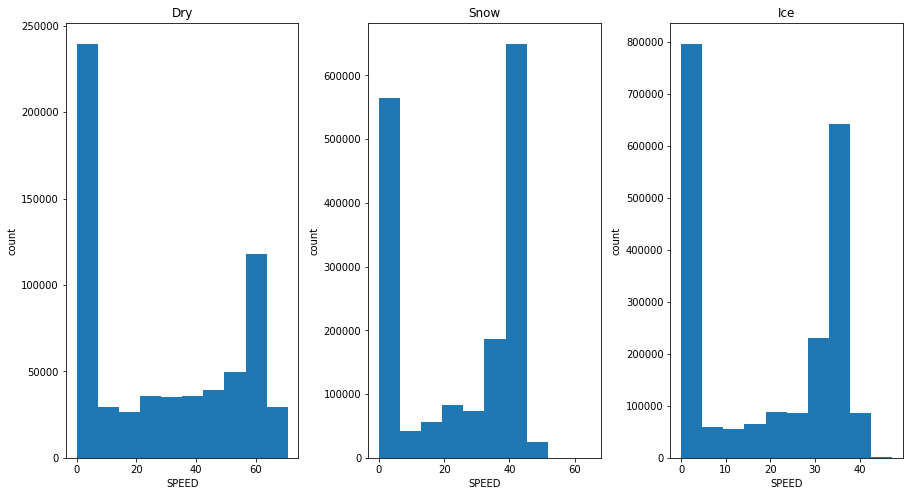

In [304]:
hist_of_vehicles_data_under_diff_pavement(ds, veh_data = 'SPEED')

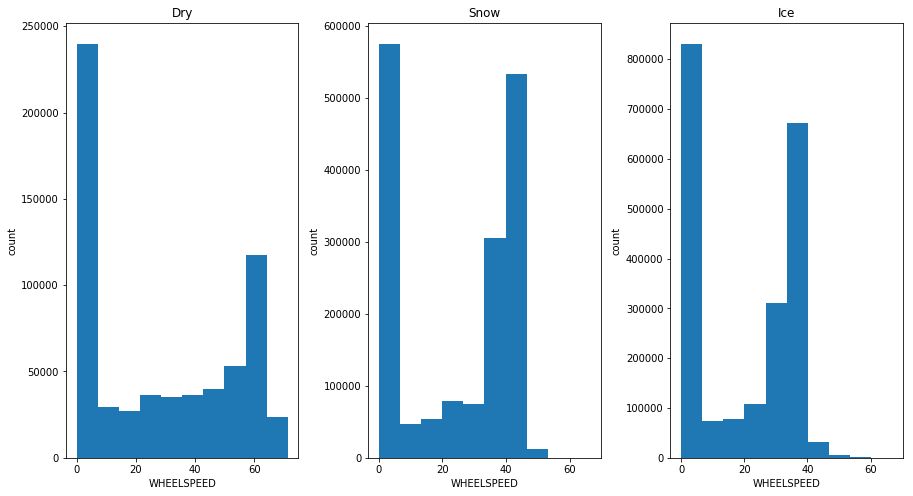

In [305]:
hist_of_vehicles_data_under_diff_pavement(ds, veh_data = 'WHEELSPEED')

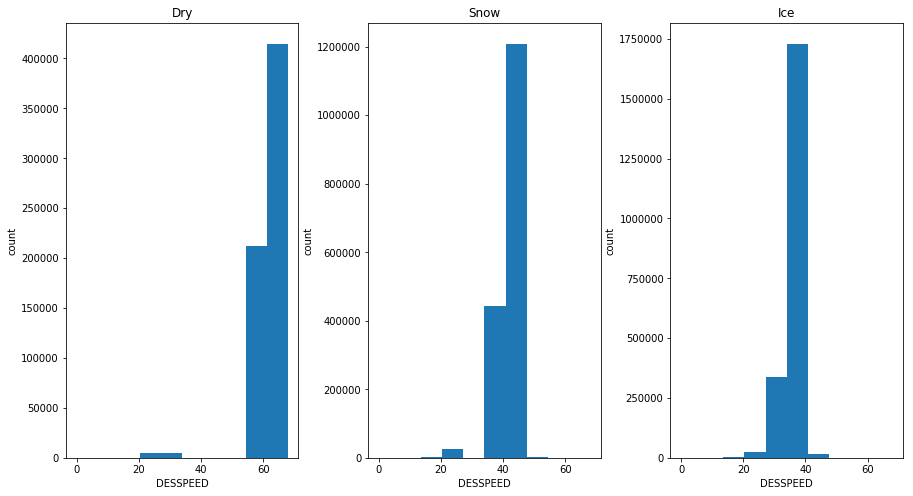

In [306]:
hist_of_vehicles_data_under_diff_pavement(ds, veh_data = 'DESSPEED')

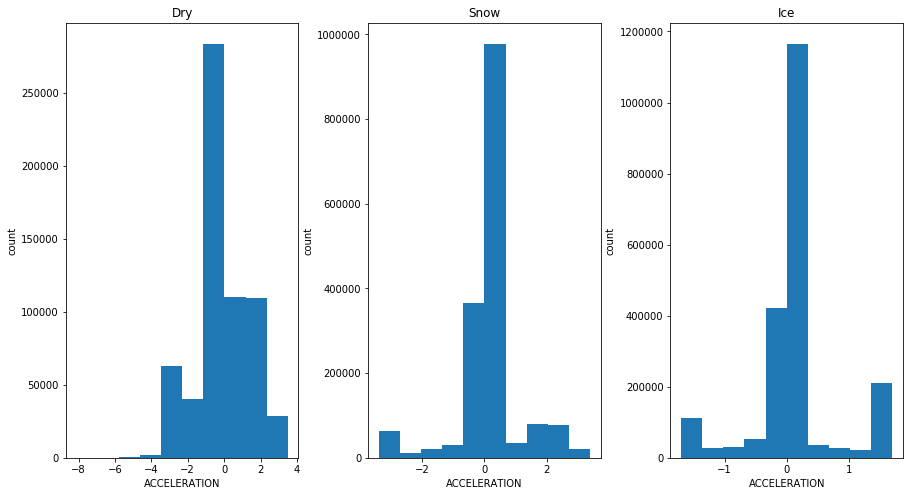

In [307]:
hist_of_vehicles_data_under_diff_pavement(ds, veh_data = 'ACCELERATION')

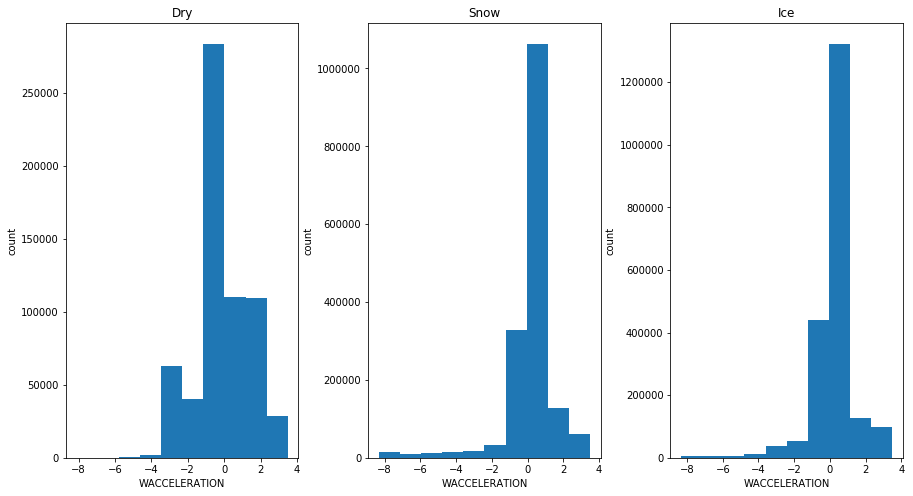

In [308]:
hist_of_vehicles_data_under_diff_pavement(ds, veh_data = 'WACCELERATION')

## Vehicle level

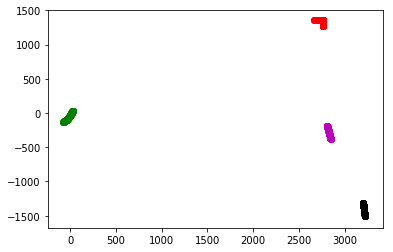

In [242]:
Veh_01 = ds[ds.NO == 1]
plt.scatter(Veh_01.X[Veh_01.INTER==1], Veh_01.Y[Veh_01.INTER==1], c = 'r')
plt.scatter(Veh_01.X[Veh_01.INTER==2], Veh_01.Y[Veh_01.INTER==2], c = 'g')
plt.scatter(Veh_01.X[Veh_01.INTER==3], Veh_01.Y[Veh_01.INTER==3], c = 'b')
plt.scatter(Veh_01.X[Veh_01.INTER==4], Veh_01.Y[Veh_01.INTER==4], c = 'y')
plt.scatter(Veh_01.X[Veh_01.INTER==5], Veh_01.Y[Veh_01.INTER==5], c = 'k')
plt.scatter(Veh_01.X[Veh_01.INTER==6], Veh_01.Y[Veh_01.INTER==6], c = 'm')

 I1: 3193 I2: 2951 I3: 2191 I4: 1636 I5: 2129  I6: 1382


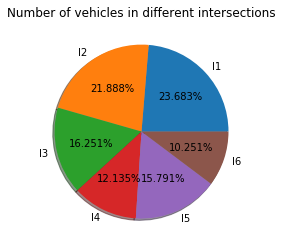

In [243]:
I1 =  len(set(ds.NO[ds['INTER'] == 1]))
I2 =  len(set(ds.NO[ds['INTER'] == 2]))
I3 =  len(set(ds.NO[ds['INTER'] == 3]))
I4 =  len(set(ds.NO[ds['INTER'] == 4]))
I5 =  len(set(ds.NO[ds['INTER'] == 5]))
I6 =  len(set(ds.NO[ds['INTER'] == 6]))
print(f" I1: {I1} I2: {I2} I3: {I3} I4: {I4} I5: {I5}  I6: {I6}")
plt.pie([I1, I2, I3, I4, I5, I6],
        labels = ['I1', 'I2', 'I3', 'I4', 'I5', 'I6'],
        autopct='%1.3f%%',shadow=True)
plt.title('Number of vehicles in different intersections');

 Dry: 1055  Snow: 2382  Ice: 2514


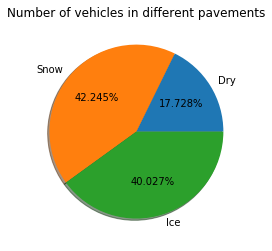

In [244]:
unique_no_dry =  len(set(ds.NO[ds['VEHTYPE'] == 100]))
unique_no_snow = len(set(ds.NO[ds['VEHTYPE'] == 101]))
unique_no_ice = len(set(ds.NO[ds['VEHTYPE'] == 102]))
print(f" Dry: {unique_no_dry}  Snow: {unique_no_snow}  Ice: {unique_no_ice}")

plt.pie([unique_no_dry, unique_no_ice, unique_no_snow],
        labels = ['Dry','Snow','Ice'],
        autopct='%1.3f%%',shadow=True)
plt.title('Number of vehicles in different pavements');

In [245]:
Vehs_dry = ds[ds.VEHTYPE == 100]
Vehs_snow = ds[ds.VEHTYPE == 101]
Vehs_ice = ds[ds.VEHTYPE == 102]
Vehs_dict = {'Dry':Vehs_dry, 'Snow':Vehs_snow, 'Ice':Vehs_ice}

In [246]:
Vehs_dry_NO = set(Vehs_dry.NO)
Vehs_snow_NO = set(Vehs_snow.NO)
Vehs_ice_NO = set(Vehs_ice.NO)

In [68]:
Vehs_dry_NO

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [69]:
Vehs_snow_NO

{269,
 313,
 340,
 457,
 462,
 508,
 519,
 544,
 550,
 552,
 555,
 556,
 560,
 565,
 571,
 587,
 591,
 627,
 628,
 636,
 644,
 653,
 662,
 667,
 670,
 680,
 684,
 713,
 717,
 718,
 723,
 726,
 735,
 741,
 742,
 753,
 754,
 756,
 757,
 758,
 769,
 774,
 778,
 779,
 780,
 783,
 784,
 785,
 787,
 789,
 790,
 792,
 793,
 795,
 796,
 797,
 798,
 799,
 800,
 801,
 802,
 803,
 805,
 806,
 807,
 808,
 809,
 811,
 812,
 813,
 814,
 815,
 816,
 817,
 818,
 819,
 820,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 829,
 830,
 833,
 834,
 835,
 836,
 837,
 838,
 839,
 840,
 841,
 842,
 843,
 844,
 845,
 846,
 847,
 848,
 849,
 850,
 851,
 852,
 853,
 854,
 856,
 857,
 858,
 859,
 860,
 861,
 862,
 863,
 864,
 865,
 866,
 867,
 869,
 870,
 871,
 872,
 873,
 874,
 875,
 876,
 877,
 878,
 879,
 880,
 881,
 884,
 885,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 902,
 903,
 904,
 905,
 906,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919

In [70]:
Vehs_ice_NO

{2228,
 2307,
 2328,
 2334,
 2356,
 2365,
 2387,
 2442,
 2450,
 2474,
 2513,
 2522,
 2548,
 2553,
 2556,
 2561,
 2571,
 2586,
 2598,
 2601,
 2608,
 2615,
 2640,
 2654,
 2659,
 2664,
 2668,
 2669,
 2687,
 2695,
 2706,
 2721,
 2724,
 2725,
 2726,
 2727,
 2730,
 2731,
 2732,
 2733,
 2734,
 2735,
 2737,
 2738,
 2741,
 2743,
 2744,
 2746,
 2747,
 2748,
 2750,
 2752,
 2753,
 2754,
 2755,
 2756,
 2757,
 2758,
 2759,
 2761,
 2762,
 2763,
 2765,
 2766,
 2767,
 2768,
 2769,
 2770,
 2771,
 2772,
 2773,
 2774,
 2777,
 2778,
 2779,
 2780,
 2781,
 2782,
 2783,
 2785,
 2786,
 2787,
 2788,
 2789,
 2790,
 2791,
 2792,
 2793,
 2794,
 2795,
 2796,
 2797,
 2798,
 2799,
 2800,
 2801,
 2802,
 2803,
 2804,
 2805,
 2807,
 2808,
 2809,
 2810,
 2811,
 2812,
 2813,
 2814,
 2815,
 2816,
 2817,
 2818,
 2819,
 2820,
 2821,
 2822,
 2824,
 2825,
 2826,
 2827,
 2828,
 2831,
 2832,
 2833,
 2834,
 2835,
 2836,
 2837,
 2838,
 2839,
 2840,
 2841,
 2842,
 2844,
 2845,
 2846,
 2847,
 2848,
 2849,
 2851,
 2852,
 2853,
 2854,

In [142]:
def draw_one_vehicle_feature(Vehs_dict, Pave_type, Veh_NO):
   
    Vehs = Vehs_dict[Pave_type]
    Vehs = Vehs[Vehs.NO == Veh_NO]
    Vehs = Vehs.groupby('INTER')
    #fig.figure(dpi = 100)
    fig = plt.figure(figsize=(18, 12))
    fig.subplots_adjust(wspace=0.3, hspace=.2)
    for i, (inter, Veh) in enumerate(Vehs):
        Time_small = Veh['SIMSEC'].values#[::10]
        Speed_small = Veh['SPEED'].values#[::10]
        Wspeed_small = Veh['WHEELSPEED'].values#[::10]
        Accel_small = Veh['ACCELERATION'].values#[::10]
        WAccel_small = Veh['WACCELERATION'].values#[::10]   
        ax1 = plt.subplot(2, 3, i + 1)
        ax1.plot(Time_small, Speed_small, 'r', label = 'Driving speed') 
        ax1.plot(Time_small, Wspeed_small, 'b', label = 'Wheel speed')
        ax1.plot(np.nan, 'y', label = 'WAcceleration')
        ax1.plot(np.nan, 'g', label = 'Acceleration')
        
#        ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
        ax1.yaxis.set_major_locator(ticker.MultipleLocator(5))
        ax1.set_ylim(0, 70)
        
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Speed (km/h)')
        
        ax2 = ax1.twinx()
        ax2.plot(Time_small, WAccel_small, 'y', label = 'WAcceleration')
        ax2.plot(Time_small, Accel_small, 'g', label = 'Acceleration')
        ax2.set_ylabel('Acceleration (m/s2)')
        ax2.set_ylim(-8, 4)
        ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

        ax1.legend(loc="lower right", frameon = False)
        ax1.set_title(f"Driving On {Pave_type} Road at {inter} Intersection")
        ax1.grid()

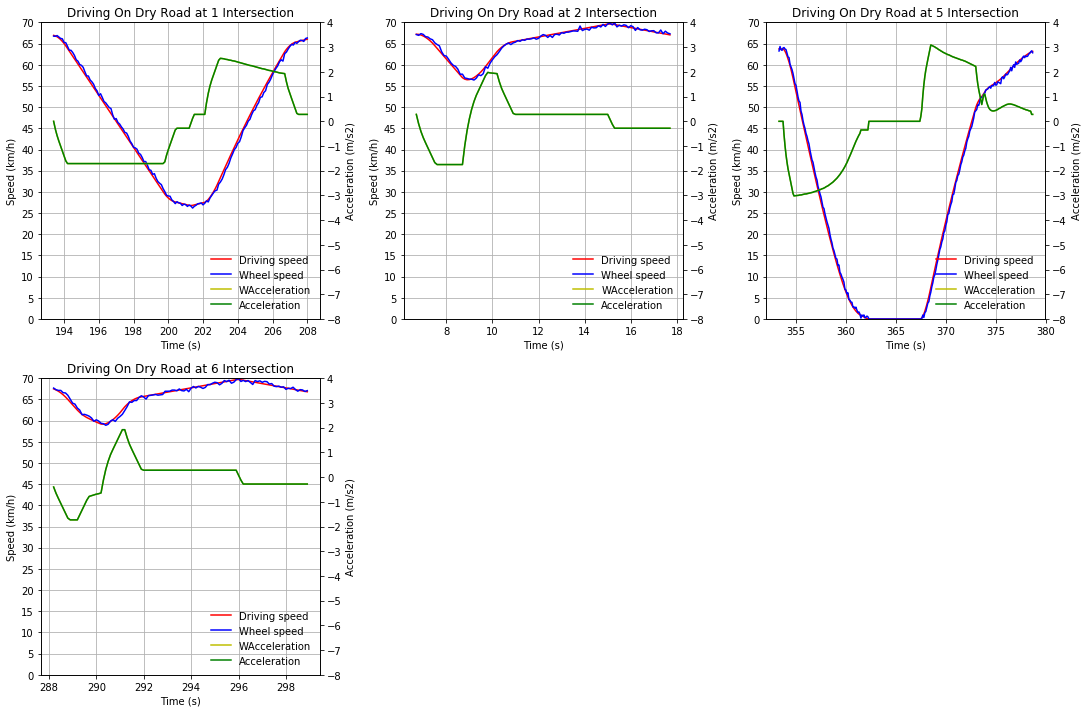

In [247]:
draw_one_vehicle_feature(Vehs_dict, Pave_type='Dry', Veh_NO=1)

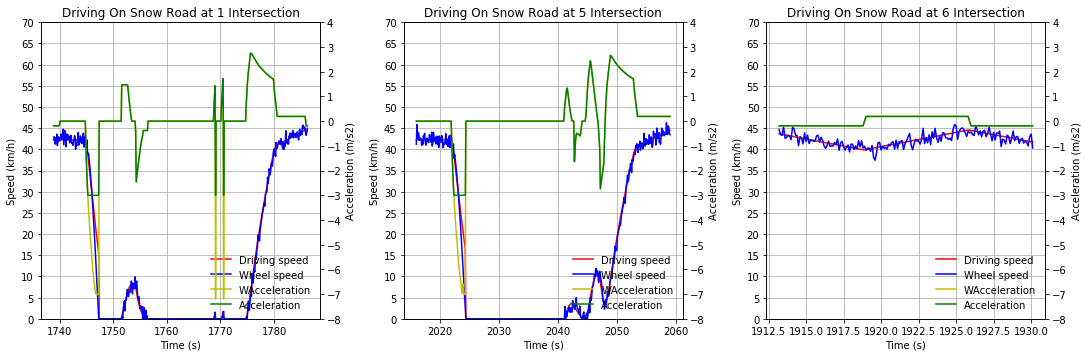

In [248]:
draw_one_vehicle_feature(Vehs_dict, Pave_type='Snow', Veh_NO=2048)

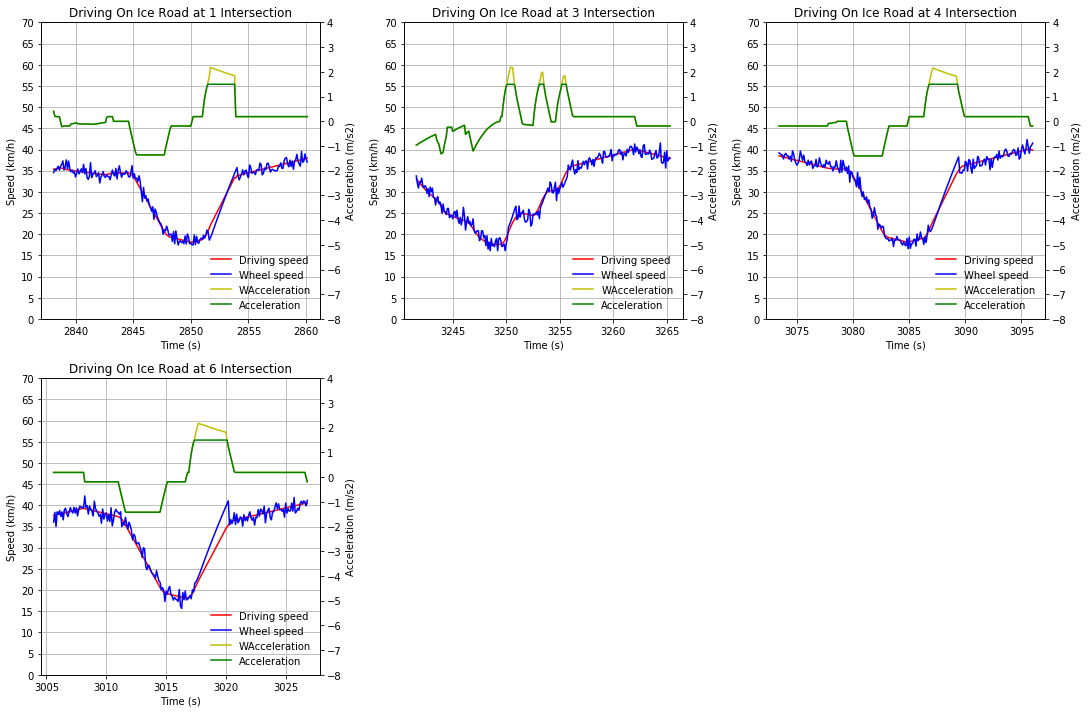

In [251]:
draw_one_vehicle_feature(Vehs_dict, Pave_type='Ice', Veh_NO=2910)

In [252]:
def draw_one_vehicle_trajectory(Vehs_dict, Pave_type, Veh_NO):
   
    Vehs = Vehs_dict[Pave_type]
    Vehs = Vehs[Vehs.NO == Veh_NO]
    Vehs = Vehs.groupby('INTER')
    #fig.figure(dpi = 100)
    fig = plt.figure(figsize=(20, 12))
    fig.subplots_adjust(wspace=0.3, hspace=.2)
    for i, (inter, Veh) in enumerate(Vehs):
        Time_small = Veh['SIMSEC'].values#[::10]
        X_small = Veh['X'].values#[::10]
        Y_small = Veh['Y'].values#[::10]
             
        ax1 = plt.subplot(2, 3, i + 1, projection='3d')
        ax1.plot3D(X_small, Y_small, Time_small, 'k')
        
        ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
        ax1.yaxis.set_major_locator(ticker.MultipleLocator(20))
        
        ax1.set_xlabel('X (m)')
        ax1.set_ylabel('Y (m)')
        ax1.set_zlabel('Time (s)') 
        
        ax1.set_title(f"Driving On {Pave_type} Road at {inter} Intersection")

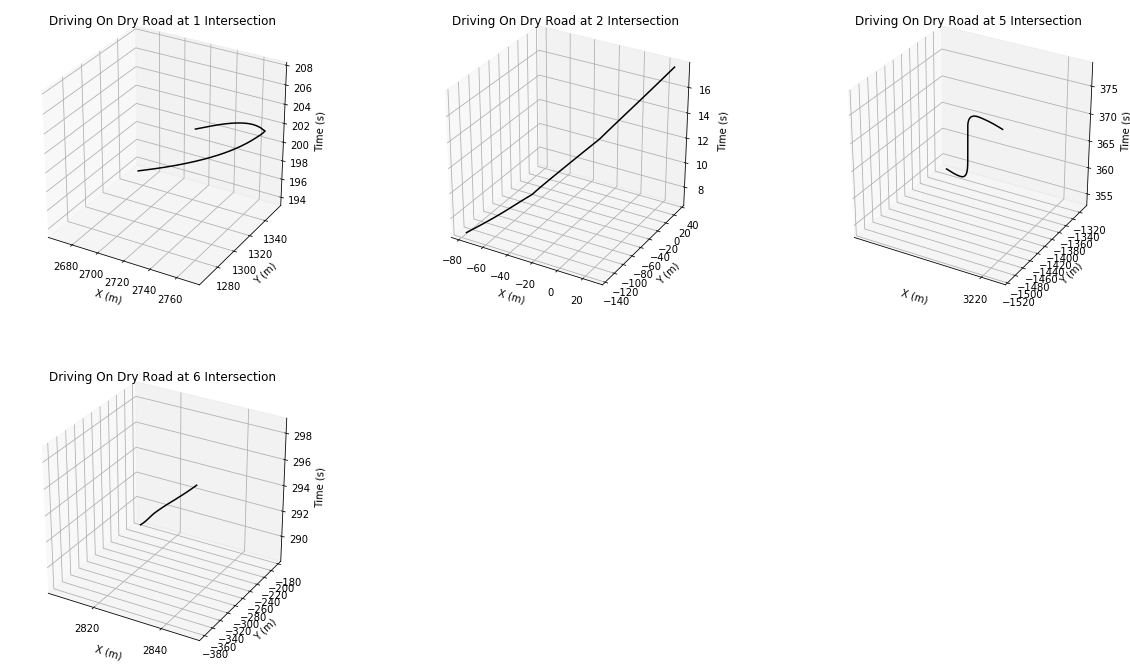

In [149]:
draw_one_vehicle_trajectory(Vehs_dict, 'Dry', 1)

## Intersection level

In [159]:
def draw_intersection_vehicles(Vehs_dict, Pave_type, Inter_No):

    Vehs = Vehs_dict[Pave_type]
    Vehs = Vehs[Vehs.INTER == Inter_No]
    Vehs_NO = random.choices(list(set(Vehs.NO)), k=6)

    fig = plt.figure(figsize=(20, 12))
    fig.subplots_adjust(wspace=0.3, hspace=.2)
    for i in range(len(Vehs_NO)):
        Veh = Vehs[Vehs.NO == Vehs_NO[i]]
        Time_small = Veh['SIMSEC'].values  # [::10]
        Speed_small = Veh['SPEED'].values  # [::10]
        Wspeed_small = Veh['WHEELSPEED'].values  # [::10]
        Accel_small = Veh['ACCELERATION'].values 
        WAccel_small = Veh['WACCELERATION'].values

        ax1 = plt.subplot(2, 3, i + 1)
        ax1.plot(Time_small, Speed_small, 'r', label='Driving speed')
        ax1.plot(Time_small, Wspeed_small, 'b', label='Wheel speed')
        ax1.plot(np.nan, 'y', label = 'WAcceleration')
        ax1.plot(np.nan, 'g', label='Acceleration')

#        ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
        ax1.yaxis.set_major_locator(ticker.MultipleLocator(5))
        ax1.set_ylim(0, 70)

        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Speed (km/h)')

        ax2 = ax1.twinx()
        ax2.plot(Time_small, WAccel_small, 'y', label='Acceleration')
        ax2.plot(Time_small, Accel_small, 'g', label='Acceleration')
        ax2.set_ylabel('Acceleration (m/s2)')
        ax2.set_ylim(-8, 4)
        ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

        ax1.legend(loc="lower right", frameon=False)
        ax1.set_title(
            f"Vehicle #{Vehs_NO[i]} Driving On {Pave_type} Road at {Inter_No} Intersection")
        ax1.grid()

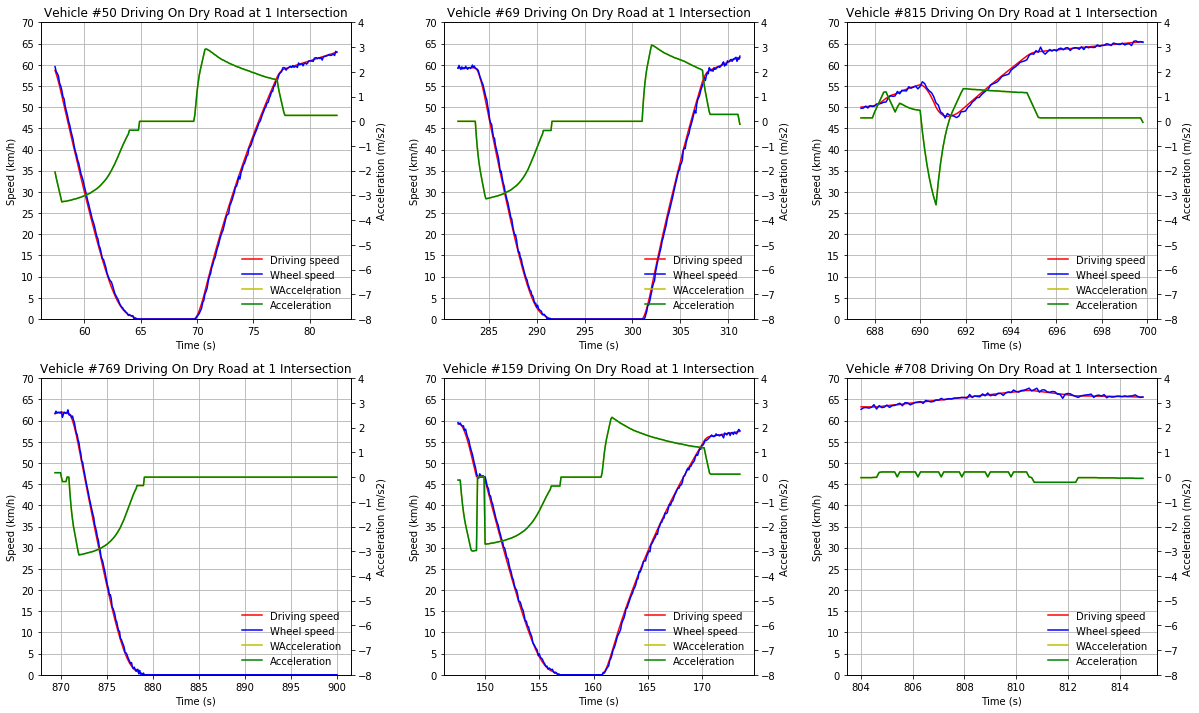

In [253]:
draw_intersection_vehicles(Vehs_dict, Pave_type = 'Dry', Inter_No = 1)

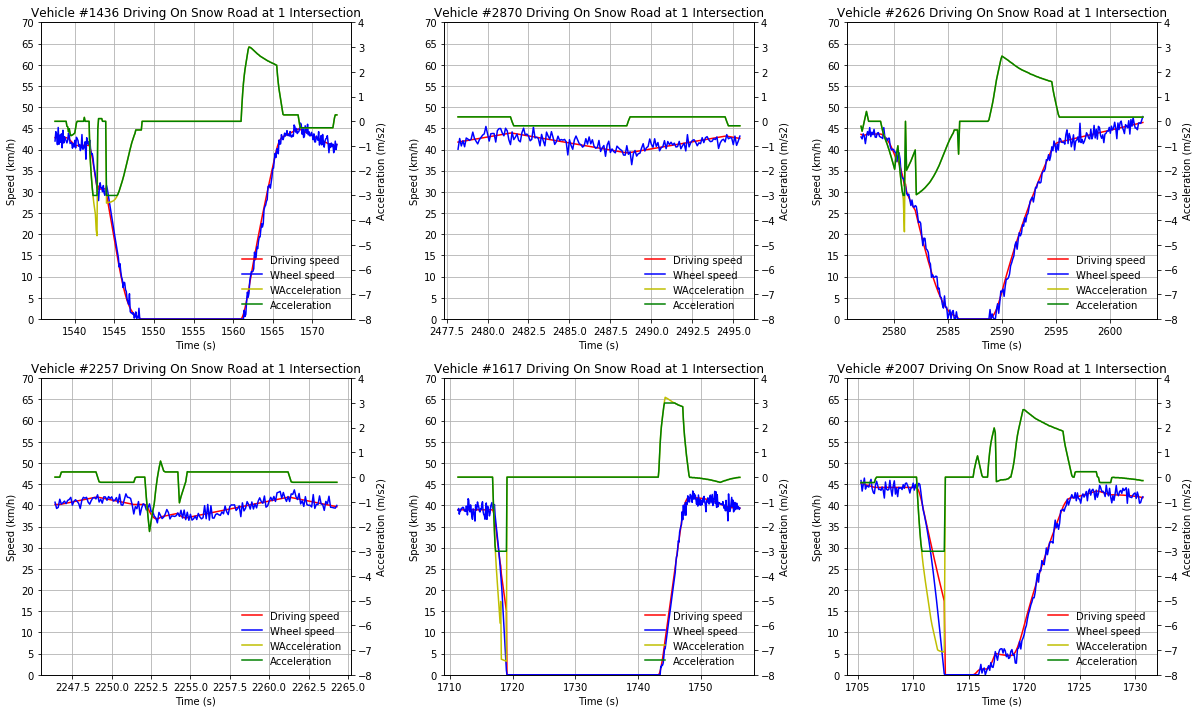

In [254]:
draw_intersection_vehicles(Vehs_dict, Pave_type = 'Snow', Inter_No = 1)

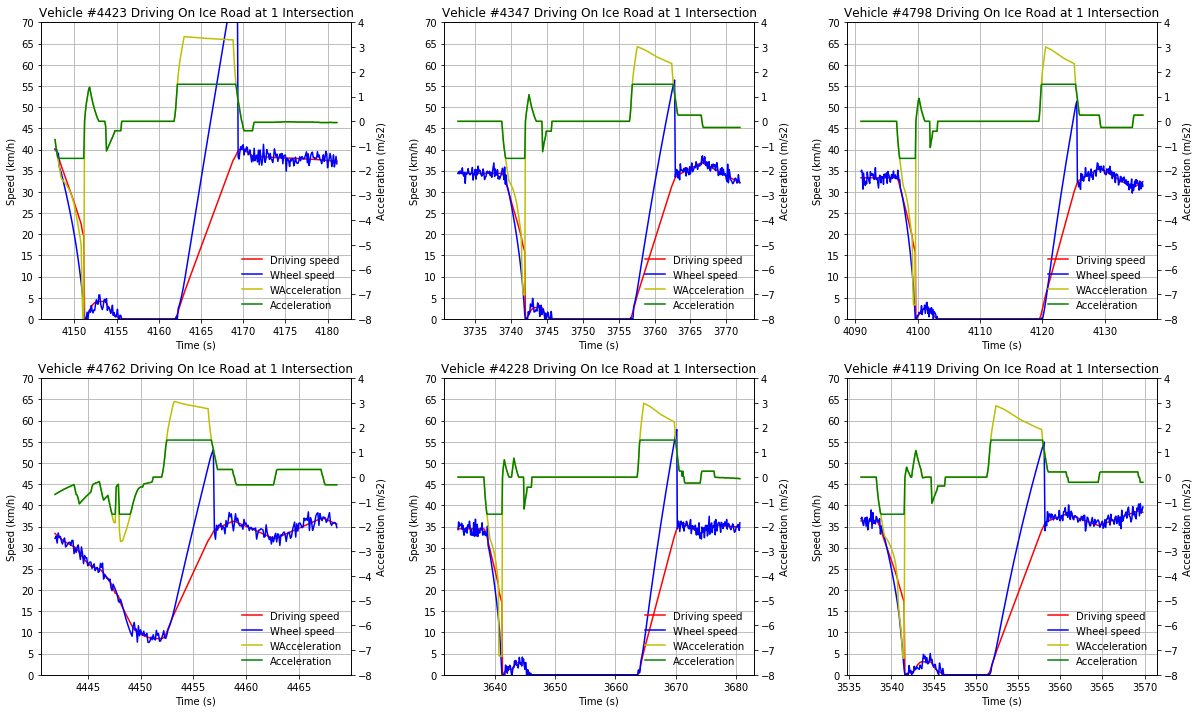

In [255]:
draw_intersection_vehicles(Vehs_dict, Pave_type = 'Ice', Inter_No = 1)

In [256]:
ds_nonstop = ds[ds.SPEED != 0]
ds_nonstop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136411 entries, 0 to 4390276
Data columns (total 15 columns):
SIMSEC           float64
NO               int64
VEHTYPE          int64
LANE-LINK-NO     int64
LANE-INDEX       int64
POS              float64
ACCELERATION     float64
SPEED            float64
WHEELSPEED       float64
DESSPEED         float64
QTIME            float64
X                float64
Y                float64
WACCELERATION    float64
INTER            int64
dtypes: float64(10), int64(5)
memory usage: 382.9 MB


In [208]:
def draw_intersection_feature(ds, feature):

    fig = plt.figure(figsize=(20, 12))
    fig.subplots_adjust(wspace=0.3, hspace=.1)
    Vehs = ds.groupby('INTER')
    
    for i, (inter, vehs) in enumerate(Vehs):
        
        vehs = vehs.groupby('VEHTYPE')
        vehs_list = []
        for _, vehs1 in vehs:
            vehs_list.append(vehs1[feature])
        
        plt.subplot(1,6,i+1)
        plt.boxplot(vehs_list, labels = ['Dry', 'Snow', 'Ice'])
        plt.ylabel(feature) 
        plt.title(f'#{inter} intersection')

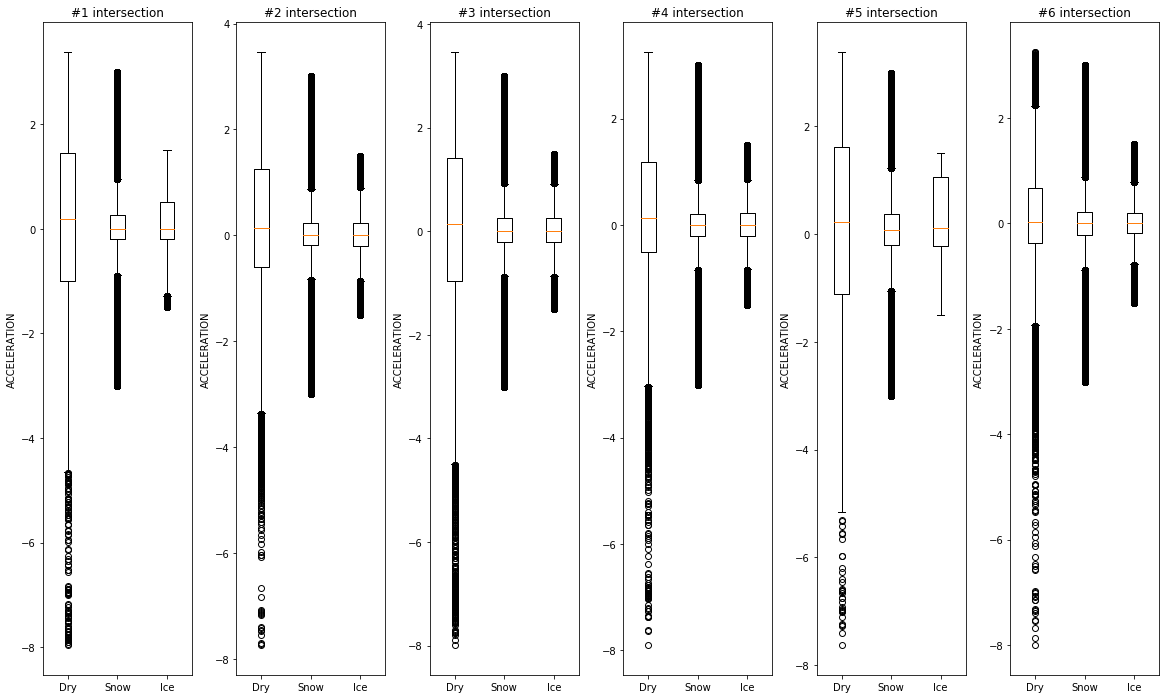

In [257]:
draw_intersection_feature(ds_nonstop, feature='ACCELERATION')

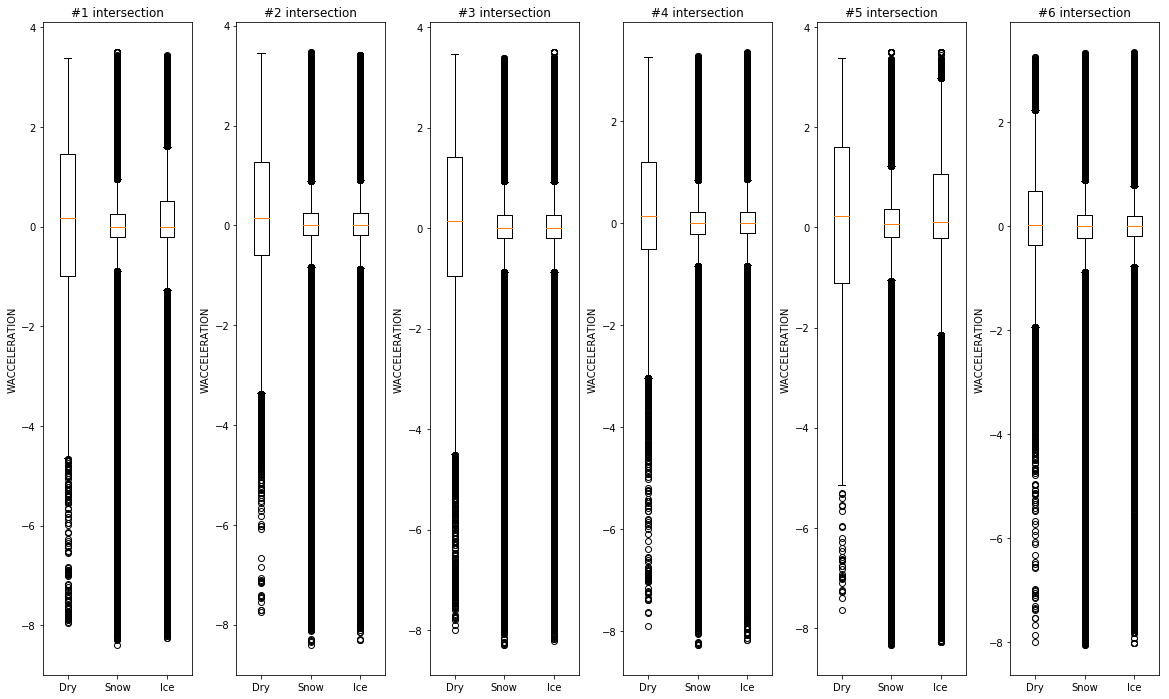

In [258]:
draw_intersection_feature(ds_nonstop, feature='WACCELERATION')

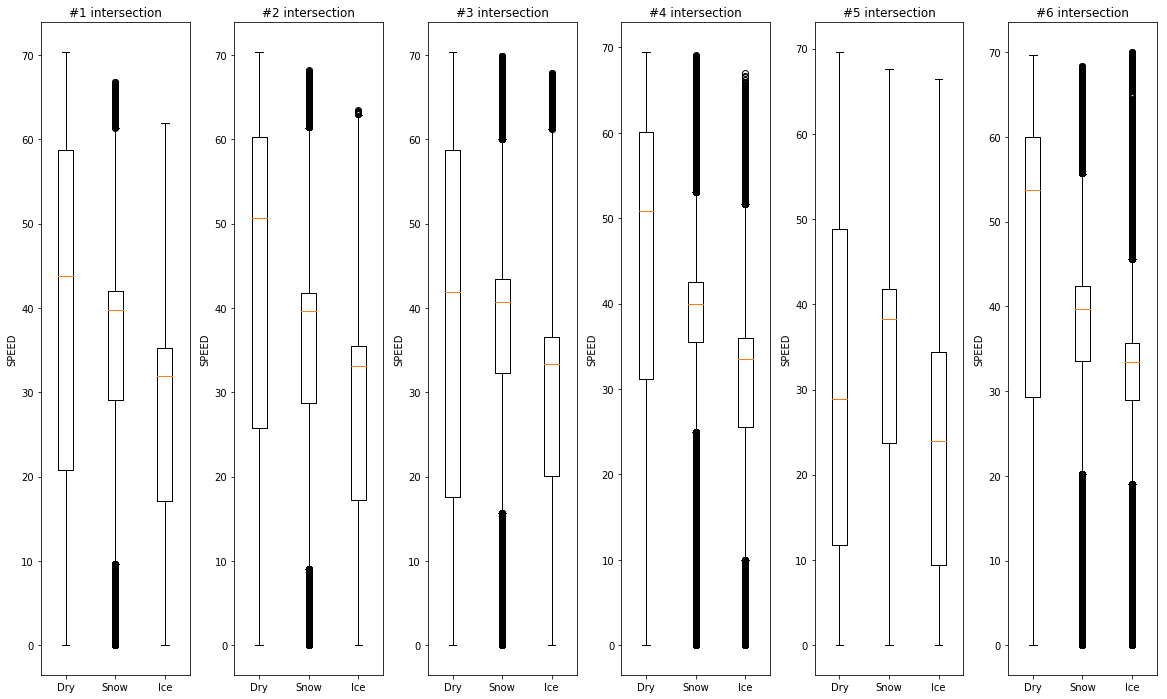

In [168]:
draw_intersection_feature(ds_nonstop, feature='SPEED')

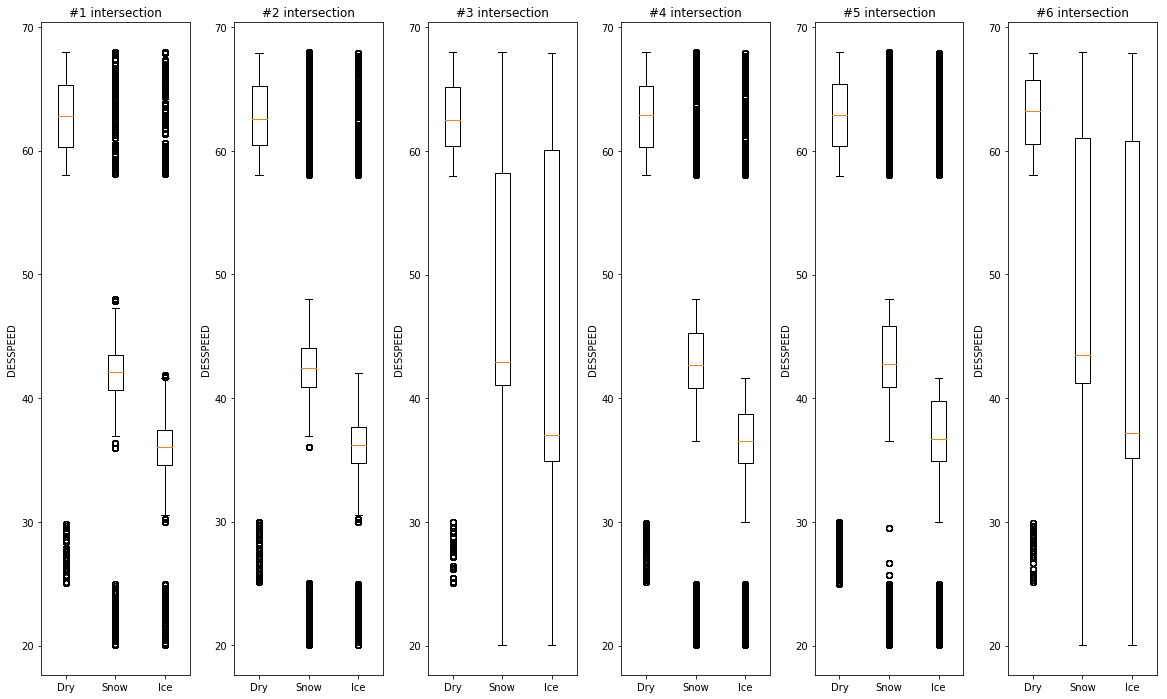

In [169]:
draw_intersection_feature(ds_nonstop, feature='DESSPEED')

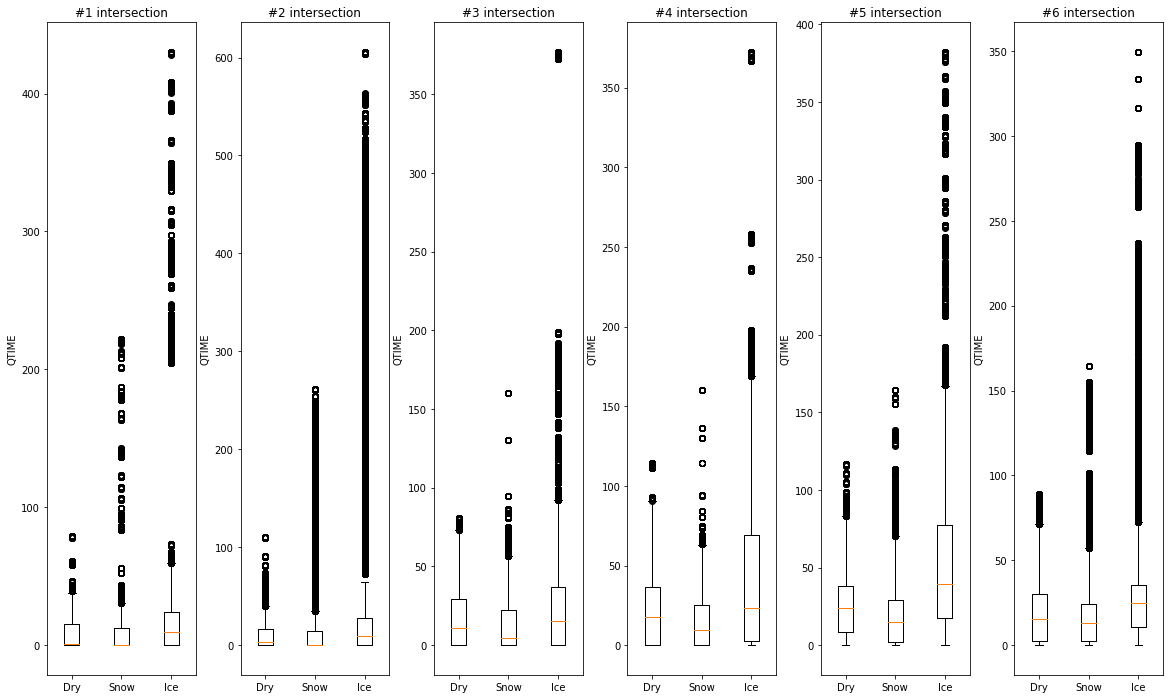

In [170]:
draw_intersection_feature(ds_nonstop, feature='QTIME')